### Need to get updated on the following :
 - SMOTE
 - Mutual Information
 - https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2515362/
 - https://abdalimran.github.io/2019-06-01/Drawing-multiple-ROC-Curves-in-a-single-plot

# A. Pre-processing 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_columns=100
pd.options.display.max_rows=100
pd.set_option('display.float_format','{:.2f}'.format)

### 1.1 Read - head  - shape
- We have total 6819 records from 96 columns in the dataset,of which:
    - 1 Target (Bankrupt?)
    - 95 features

In [4]:
data_path = "E:/Shaswata/datasets"
data = pd.read_csv(data_path+"/bankruptcy_dataset/bankruptcy_data.csv")
print(data.shape)
data.head(3)

(6819, 96)


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.37,0.42,0.41,0.60,0.60,1.00,0.80,0.81,0.30,0.78,0.00,0.00,0.46,0.00,0.00,0.15,0.15,0.15,0.17,0.31,0.02,0.10,0.14,0.02,0.85,0.69,0.69,0.22,4980000000.00,0.00,0.26,0.36,0.00,0.00,0.63,0.02,0.21,0.79,0.01,0.39,0.01,0.10,0.14,0.40,0.09,0.00,0.00,0.00,0.00,0.03,0.03,0.39,0.04,0.67,0.17,0.19,0.00,0.00,0.00,0.15,0.33,0.28,0.00,0.68,0.72,0.34,0.03,0.90,0.00,0.06,701000000.00,6550000000.00,0.59,458000000.00,0.67,0.42,0.68,0.34,0.13,0.64,0.46,0.52,0.31,0.12,0,0.72,0.01,0.62,0.60,0.83,0.29,0.03,0.56,1,0.02
1,1,0.46,0.54,0.52,0.61,0.61,1.00,0.80,0.81,0.30,0.78,0.00,0.00,0.46,0.00,0.00,0.18,0.18,0.18,0.21,0.32,0.02,0.09,0.17,0.02,0.85,0.69,0.69,0.22,6110000000.00,0.00,0.26,0.38,0.01,0.00,0.64,0.01,0.17,0.83,0.01,0.38,0.01,0.09,0.17,0.40,0.06,0.00,0.00,9360000000.00,719000000.00,0.03,0.01,0.39,0.01,0.75,0.13,0.18,0.01,0.00,0.00,0.06,0.34,0.29,0.01,0.31,0.73,0.33,0.02,0.93,0.00,0.03,0.00,7700000000.00,0.59,2490000000.00,0.67,0.47,0.31,0.33,0.12,0.64,0.46,0.57,0.31,0.05,0,0.80,0.01,0.62,0.61,0.84,0.28,0.26,0.57,1,0.02
2,1,0.43,0.50,0.47,0.60,0.60,1.00,0.80,0.81,0.30,0.78,0.00,25500000.00,0.46,0.00,0.00,0.18,0.18,0.19,0.18,0.31,0.01,0.09,0.14,0.02,0.85,0.69,0.69,0.22,7280000000.00,0.00,0.26,0.37,0.01,0.01,0.63,0.02,0.21,0.79,0.01,0.38,0.01,0.09,0.15,0.41,0.01,0.00,0.00,65000000.00,2650000000.00,0.01,0.03,0.38,0.14,0.83,0.3

### 1.2 Info , describe
- one var has 0 var
- major vars are in the range of 0-1
- there are outlier infected variables

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [6]:
data.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00
mean,0.03,0.51,0.56,0.55,0.61,0.61,1.00,0.80,0.81,0.30,0.78,1995347312.80,1950427306.06,0.47,16448012.91,0.12,0.19,0.19,0.19,0.23,0.32,1328640.60,0.11,0.18,0.02,0.85,0.69,0.69,0.22,5508096595.25,1566212.06,0.26,0.38,403284.95,8376594.82,0.63,4416336.71,0.11,0.89,0.01,0.37,0.01,0.11,0.18,0.40,0.14,12789705.24,9826220.86,2149106056.61,1008595981.82,0.04,2325854.27,0.40,11255785.32,0.81,0.40,0.52,0.12,3592902.20,37159994.15,0.09,0.35,0.28,55806804.53,0.76,0.74,0.33,54160038.14,0.93,0.00,0.03,1195855763.31,2163735272.03,0.59,2471976967.44,0.67,1220120.50,0.

In [3]:
plt.pie(data.B)

### 2. Sanity Check
#### Column Names:
- Remove leading whitespaces from Column names
- Replace " " with "_" in columnnames
- Rename Target column

#### Check constant Columns:
- ***Net Income Flag*** is constant, hence drop
- Rename ***Bankrupt?  -> Bankrupt***

#### Check Duplicates
 - No duplicated values

#### Check Missing Values
- No missing values

In [7]:
print("Column names before renaming","\n", data.columns[:5],"\n")
data.columns = data.columns.str.strip()
data.columns = data.columns.str.replace(" " ,"_")
data.rename(columns = {'Bankrupt?' :'Bankrupt' },inplace=True)
print("Column names after renaming","\n",data.columns[:5])

Column names before renaming 
 Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin'],
      dtype='object') 

Column names after renaming 
 Index(['Bankrupt', 'ROA(C)_before_interest_and_depreciation_before_interest',
       'ROA(A)_before_interest_and_%_after_tax',
       'ROA(B)_before_interest_and_depreciation_after_tax',
       'Operating_Gross_Margin'],
      dtype='object')


In [8]:
data.drop(['Net_Income_Flag'],axis=1,inplace=True) ## drop constant columns

In [9]:
data.duplicated(keep=False).sum()  ## no duplicates

0

In [10]:
data.isnull().values.sum() # check missing values

0

### 3.1 Target Class distribution
- Bankruptcy Rate is around 3.2%


In [11]:
df1 = pd.DataFrame(data.Bankrupt.value_counts())
df2 = pd.DataFrame(100*data.Bankrupt.value_counts(normalize=True).astype(float))
df1.merge(df2,left_index=True,right_index=True).rename(columns = {"Bankrupt_x" : "Count" , "Bankrupt_y" : "Percentage"})

,Count,Percentage
0,6599,96.77
1,220,3.23


### 3.2  Outliers Handling
- First separate all **94** features into two groups
    - _fraction-only_ features (i.e. features having values in [0,1])
    - _other than fraction-only_ features

- **70** features are _fraction-only_ features where as **24** are _other than fraction-only_ features.

- Outliers are mainly **present** in these 24 _"other than fraction-only"_ features

- To explore the outliers nature, distribution of these 24 features, are obtained using :
    - Histogram
    - Boxplot

In [12]:
## fn to separate only-fractional & other columns
def get_fraction_valued_columns(df):
    my_columns  = []
    for col in df.columns:
        if (data[col].max()<=1) & (data[col].min() >= 0):
            my_columns.append(col)
    return(my_columns)

fractional_columns = get_fraction_valued_columns(df=data.drop(['Bankrupt'],axis=1))
non_fraction_columns = data.drop(['Bankrupt'],axis=1).columns.difference(fractional_columns)
print("# Fraction-only Columns",len(fractional_columns),"\n","# Other than Fraction-only Columns", len(non_fraction_columns))

# Fraction-only Columns 70 
 # Other than Fraction-only Columns 24


### Other than fration-only features : Histogram

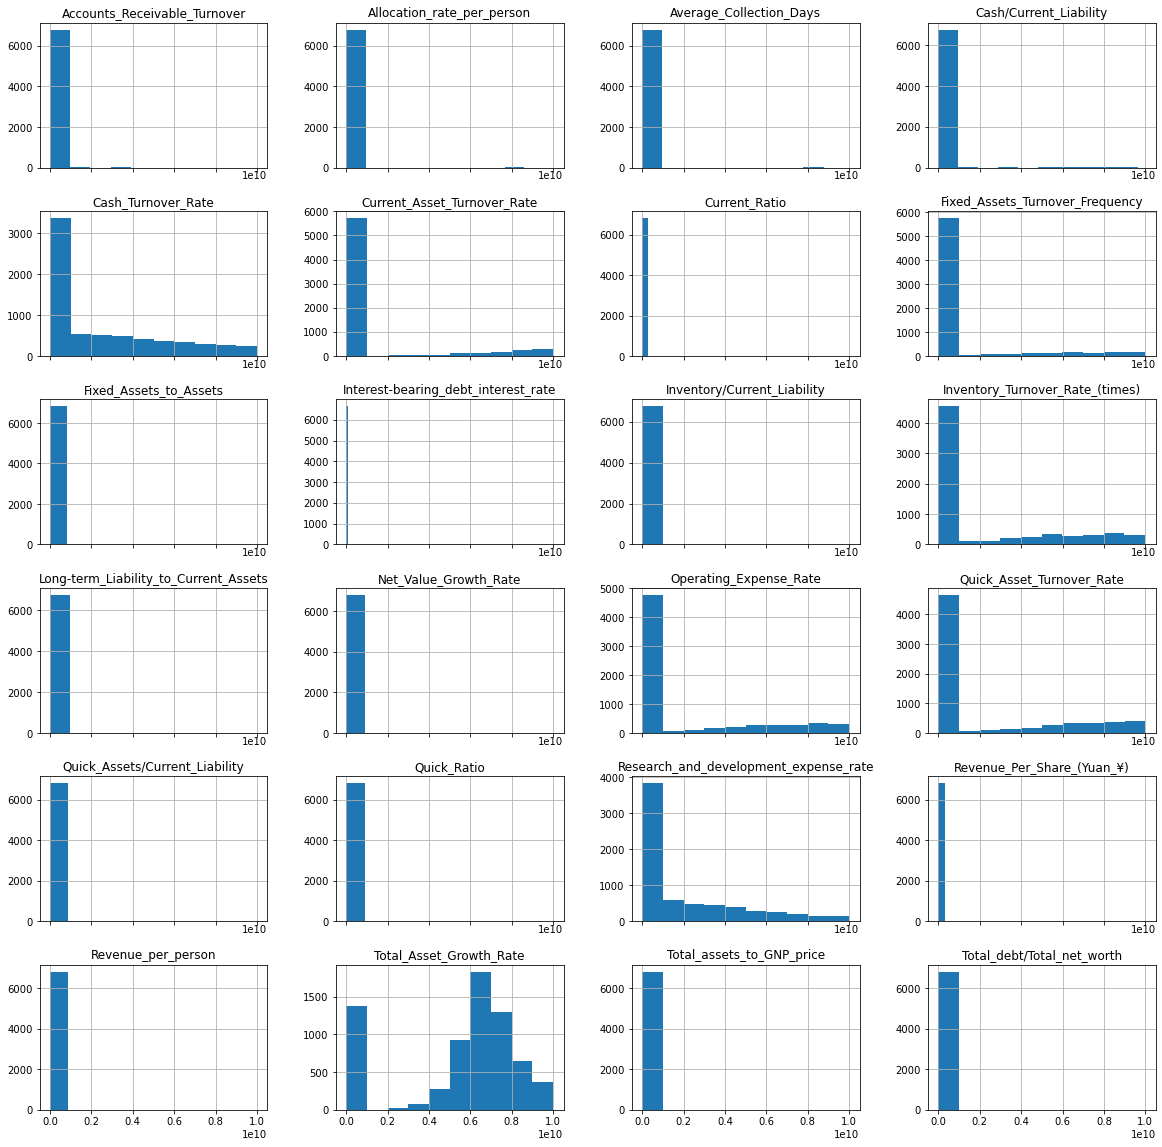

In [13]:
data[non_fraction_columns].hist(figsize= (20,20),sharex=True,layout= (6,4))
plt.show()

 ### Other than fration-only features :  Boxplot

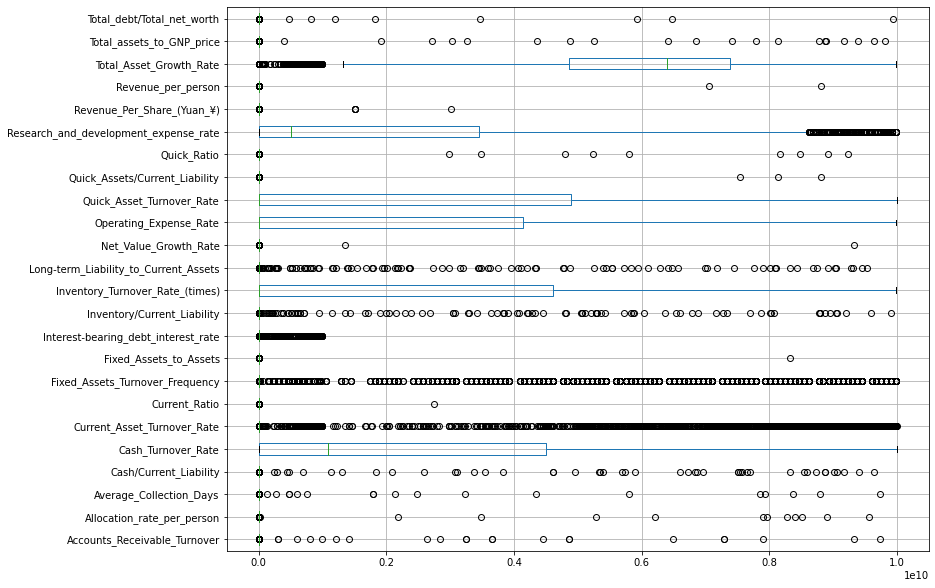

In [14]:
data[non_fraction_columns].boxplot(vert=False,figsize= (15,10))
plt.subplots_adjust(left=0.25)
plt.show()

### Observations
- Major values are concentrated around starting ranges yet there are very high valued records.
- Some features show outliers in top 1% values only.Few of such features are:
    - Total_debt/Total_net_worth 
    - Revenue_per_person
    - Net_Value_Growth_Rate
    - Revenue_Per_Share etc

2. There are some features that have significant number of higher values, like:
    - Current_Asset_Turnover_Rate
    - Cash_Turnover_Rate

- **These features may potentially seem to be outliers but not be practically so.Hence outliers here need to be handled more cautiously,simply eliminating records lying above some cutoff cant be applied for all throughout**. 

- We Need to have a rule: 

#### **Rule** :
- Only __other than fraction-only__ features are considered for outlier inspection
- Among them those meeting following conditions I decide to term them as outliers infected:
   - 100th percentile value is atleast 100 times greater than 99th percentile.
   - There are 10 or less records for 100th percentile.
- For the features satisfying above outlier condition we replace them  as x-> log(1+x)
- __N.B: This is just a rule of thumb I made based on the experience while playing with the data.__ 


In [15]:
## Outlier handling techniques
log_transformed_cols = []
for col in data[non_fraction_columns].columns:
    if (data[col].quantile(1) >= 100* data[col].quantile(0.99)) |  (sum(data[col] > data[col].quantile(0.99)) <= 10):
        data[col] = np.log1p(data[col])
        log_transformed_cols.append(col)
        
## Change names of log transformed column
log_names = "log_" + data[log_transformed_cols].columns
data.rename(columns={data[log_transformed_cols].columns[i]: log_names[i] for i in range(len(log_names))}, inplace = True)
#data.columns

The following features are log transformed after they fulfill outlier detection condition. 

 ['Accounts_Receivable_Turnover', 'Allocation_rate_per_person', 'Average_Collection_Days', 'Cash/Current_Liability', 'Current_Ratio', 'Fixed_Assets_to_Assets', 'Net_Value_Growth_Rate', 'Quick_Assets/Current_Liability', 'Quick_Ratio', 'Revenue_Per_Share_(Yuan_¥)', 'Revenue_per_person', 'Total_assets_to_GNP_price', 'Total_debt/Total_net_worth']


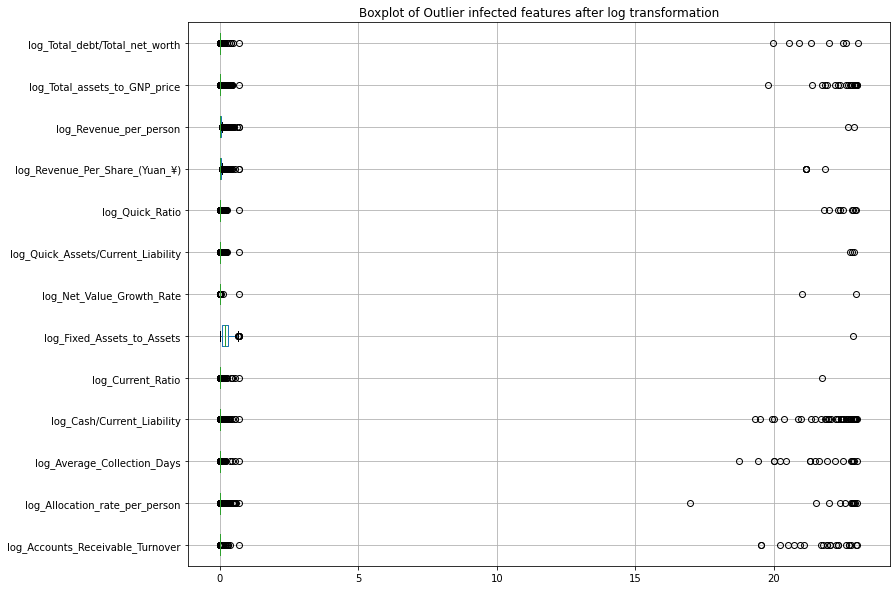

In [16]:
print("The following features are log transformed after they fulfill outlier detection condition.","\n\n",log_transformed_cols)
data[log_names].boxplot(vert=False,figsize= (15,10))
plt.subplots_adjust(left=0.25)
plt.title("Boxplot of Outlier infected features after log transformation")
plt.show()

# B. Modelling

In [17]:
X = data.drop(["Bankrupt"],axis=1)
y = data.Bankrupt

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2 , mutual_info_classif 
from imblearn.over_sampling import SMOTE 

## 1.1 Feature Scaling
- Scale all features in order to have zero mean and unit variance

In [19]:
X_scaled = pd.DataFrame(StandardScaler(copy=False).fit_transform(X))
X_scaled.columns = X.columns

##  1.2 Feature Selection
- In order to select features to be fed into the predictive model mutual information is useed.
- Features with positive mutual information are retained for final model.

In [20]:
mutual_info = mutual_info_classif(X= X_scaled,y= y)  # get mutual info all predictors
pruned_features = X.columns[np.where(mutual_info>0)]  # retain features only with mi >0
X_scaled_pruned = X_scaled[pruned_features]

## 1.3 Target class Imballance : SMOTE
- only 3.2% of the companies has Bankrupted,making the problem as imballanced targte class probelm.
- Hence positive target class( Bankrupt=1) is under-represented.
- SOMTE technique is applied to .......

In [21]:
sm = SMOTE(random_state=123)
X_sm , y_sm = sm.fit_resample(X_scaled_pruned,y)

print(f'''Shape of X before SMOTE:{X_scaled_pruned.shape}
Shape of X after SMOTE:{X_sm.shape}''',"\n\n")

print(f'''Target Class distributuion before SMOTE:\n{y.value_counts(normalize=True)}
Target Class distributuion after SMOTE :\n{y_sm.value_counts(normalize=True)}''')

Shape of X before SMOTE:(6819, 90)
Shape of X after SMOTE:(13198, 90) 


Target Class distributuion before SMOTE:
0   0.97
1   0.03
Name: Bankrupt, dtype: float64
Target Class distributuion after SMOTE :
1   0.50
0   0.50
Name: Bankrupt, dtype: float64


## 2.1 Logistic Regression
- Will be using logistic regression as our benchmark model.
- Combination of L1 & L2 regularization(Elasticnet)is applied.
- With and Without Using SMOTE

In [53]:
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn import metrics

In [24]:
x_train , x_test , y_train ,y_test = train_test_split(X_sm,y_sm,test_size= 0.33)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_fit = LogisticRegression(penalty='elasticnet',solver='saga',l1_ratio=0.5,max_iter=10000).fit(x_train,y_train)

###  Performance metrics : (Cutoff independent )

In [85]:
lr_pred = lr_fit.predict_proba(x_test)  ## predicted probabilities
lr_pred = lr_pred[:,1]  #prob(Bankrupt=0)

lr_fpr, lr_tpr, _ = metrics.roc_curve(y_test,  lr_pred)  #fpr, tpr for AUC
lr_auc = metrics.roc_auc_score(y_test,lr_pred)   #AUC

## in order to collate FPR, TPR and AUC create a dataframe  
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
result_table.set_index('classifiers', inplace=True)
result_table = result_table.append({'classifiers':"Logistic Regression",
                                        'fpr':lr_fpr, 
                                        'tpr':lr_tpr, 
                                        'auc':lr_auc}, ignore_index=True)

print('Logistic Regression AUC=%.3f' % (lr_auc))

Logistic Regression AUC=0.953


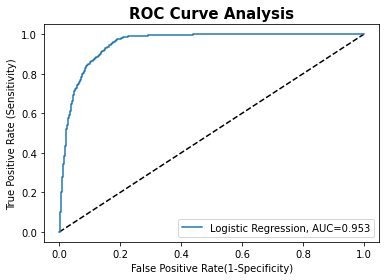

In [150]:
plt.plot([0,1], [0,1], color='black', linestyle='--')
plt.plot(lr_fpr,lr_tpr ,label="{}, AUC={:.3f}".format(result_table.loc[0,'classifiers'], result_table.loc[0]['auc']))
plt.ylabel('True Positive Rate (Sensitivity)')
plt.xlabel('False Positive Rate(1-Specificity)')
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':10}, loc='lower right')
plt.show()

### Performance Metrics (Cutoff based)

In [87]:
yhat = lr_fit.predict(x_test,)
label = ['Fin.Stable', 'Fin.Unstable']
report = metrics.classification_report(y_test, yhat,target_names=label)

print(report)
print("Confusion Matrix :", "\n" ,metrics.confusion_matrix(y_test,yhat))

              precision    recall  f1-score   support

  Fin.Stable       0.90      0.86      0.88      2183
Fin.Unstable       0.87      0.90      0.89      2173

    accuracy                           0.88      4356
   macro avg       0.88      0.88      0.88      4356
weighted avg       0.88      0.88      0.88      4356

Confusion Matrix : 
 [[1887  296]
 [ 213 1960]]


## 2.2 Support Vector Classifier

In [88]:
from sklearn import svm

In [89]:
svc_fit = svm.SVC(C=1,kernel= 'rbf',degree=3,probability=True).fit(x_train,y_train)

###  Performance metrics : (Cutoff independent )

In [90]:
svc_pred = svc_fit.predict_proba(x_test)
svc_pred = svc_pred[:,1]

svc_fpr, svc_tpr, _ = metrics.roc_curve(y_test,  svc_pred)
svc_auc = metrics.roc_auc_score(y_test,svc_pred)

result_table = result_table.append({'classifiers':"Support Vector Classifier",
                                        'fpr':svc_fpr, 
                                        'tpr':svc_tpr, 
                                        'auc':svc_auc}, ignore_index=True)

print('Support Vector Classifier AUC =%.3f' % (svc_auc))

Support Vector Classifier AUC =0.970


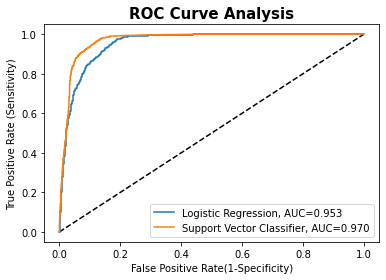

In [151]:
plt.plot([0,1], [0,1], color='black', linestyle='--')
plt.plot(lr_fpr,lr_tpr ,label="{}, AUC={:.3f}".format(result_table.loc[0,'classifiers'], result_table.loc[0]['auc']))
plt.plot(svc_fpr,svc_tpr ,label="{}, AUC={:.3f}".format(result_table.loc[1,'classifiers'], result_table.loc[1]['auc']))
plt.ylabel('True Positive Rate (Sensitivity)')
plt.xlabel('False Positive Rate(1-Specificity)')
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':10}, loc='lower right')
plt.show()

###  Performance metrics : (Cutoff based )

In [92]:
yhat = svc_fit.predict(x_test)
label = ['Fin.Stable', 'Fin.Unstable']
report = metrics.classification_report(y_test, yhat,target_names=label)

print(report)
print("Confusion Matrix :", "\n" ,metrics.confusion_matrix(y_test,yhat))

              precision    recall  f1-score   support

  Fin.Stable       0.96      0.88      0.92      2183
Fin.Unstable       0.89      0.96      0.92      2173

    accuracy                           0.92      4356
   macro avg       0.92      0.92      0.92      4356
weighted avg       0.92      0.92      0.92      4356

Confusion Matrix : 
 [[1920  263]
 [  81 2092]]


## Tree Based Ensamble Models
- Gradient Boosted Classifier
- Ada Boost Classifiers

In [93]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier

## 2.3.1 Gradient Boosted Classifiers

In [94]:
gbc = GradientBoostingClassifier(learning_rate=0.1,max_depth=2,random_state=123,subsample=0.8,n_estimators=600)
gbc_fit = gbc.fit(x_train,y_train)

###  Performance metrics : (Cutoff Independent )

In [95]:
gbc_pred = gbc_fit.predict_proba(x_test)
gbc_pred = gbc_pred[:,1]

gbc_fpr, gbc_tpr, _ = metrics.roc_curve(y_test,  gbc_pred)
gbc_auc = metrics.roc_auc_score(y_test,gbc_pred)

result_table = result_table.append({'classifiers':"Gradient Boosted Classifier",
                                    'fpr':gbc_fpr, 
                                    'tpr':gbc_tpr, 
                                    'auc':gbc_auc}, ignore_index=True)


print('Gradient Boosted Classifier AUC=%.3f' % (gbc_auc))

Gradient Boosted Classifier AUC=0.995


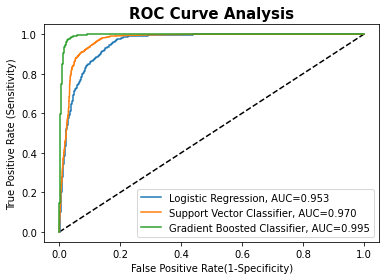

In [152]:
    plt.plot([0,1], [0,1], color='black', linestyle='--')
    plt.plot(lr_fpr,lr_tpr ,label="{}, AUC={:.3f}".format(result_table.loc[0,'classifiers'], result_table.loc[0]['auc']))
    plt.plot(svc_fpr,svc_tpr ,label="{}, AUC={:.3f}".format(result_table.loc[1,'classifiers'], result_table.loc[1]['auc']))
    plt.plot(gbc_fpr,gbc_tpr ,label="{}, AUC={:.3f}".format(result_table.loc[2,'classifiers'], result_table.loc[2]['auc']))
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.xlabel('False Positive Rate(1-Specificity)')
    plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
    plt.legend(prop={'size':10}, loc='lower right')
    plt.show()

###  Performance metrics : (Cutoff based )

In [96]:
yhat = gbc_fit.predict(x_test)
label = ['Fin.Stable', 'Fin.Unstable']
report = metrics.classification_report(y_test, yhat,target_names=label)

print(report)
print("Confusion Matrix :", "\n" ,metrics.confusion_matrix(y_test,yhat))

              precision    recall  f1-score   support

  Fin.Stable       0.99      0.95      0.97      2183
Fin.Unstable       0.96      0.99      0.97      2173

    accuracy                           0.97      4356
   macro avg       0.97      0.97      0.97      4356
weighted avg       0.97      0.97      0.97      4356

Confusion Matrix : 
 [[2082  101]
 [  21 2152]]


##  2.3.2 AdaBoost Classifier

In [39]:
abc = AdaBoostClassifier(n_estimators=500,random_state=123,learning_rate=0.3)
abc_fit = abc.fit(x_train,y_train)

###  Performance metrics : (Cutoff Independent )

In [154]:
abc_pred = abc_fit.predict_proba(x_test)
abc_pred = abc_pred[:,1]

abc_fpr, abc_tpr, _ = metrics.roc_curve(y_test,  abc_pred)
abc_auc = metrics.roc_auc_score(y_test,abc_pred)

result_table = result_table.append({'classifiers':"Ada Boosted Classifier",
                                    'fpr':abc_fpr, 
                                    'tpr':abc_tpr, 
                                    'auc':abc_auc}, ignore_index=True)

print('Ada Boosted Classifier AUC=%.3f' % (abc_auc))

Ada Boosted Classifier AUC=0.989


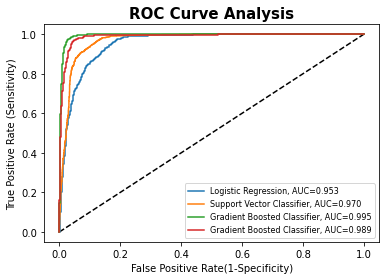

In [156]:
plt.plot([0,1], [0,1], color='black', linestyle='--')
plt.plot(lr_fpr,lr_tpr ,label="{}, AUC={:.3f}".format(result_table.loc[0,'classifiers'], result_table.loc[0]['auc']))
plt.plot(svc_fpr,svc_tpr ,label="{}, AUC={:.3f}".format(result_table.loc[1,'classifiers'], result_table.loc[1]['auc']))
plt.plot(gbc_fpr,gbc_tpr ,label="{}, AUC={:.3f}".format(result_table.loc[2,'classifiers'], result_table.loc[2]['auc']))
plt.plot(abc_fpr,abc_tpr ,label="{}, AUC={:.3f}".format(result_table.loc[3,'classifiers'], result_table.loc[3]['auc']))
plt.ylabel('True Positive Rate (Sensitivity)')
plt.xlabel('False Positive Rate(1-Specificity)')
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':8}, loc='lower right')
plt.show()

###  Performance metrics : (Cutoff Based )

In [99]:
yhat = abc_fit.predict(x_test)
label = ['Fin.Stable', 'Fin.Unstable']
report = metrics.classification_report(y_test, yhat,target_names=label)

print(report)
print("Confusion Matrix :", "\n" ,metrics.confusion_matrix(y_test,yhat))

              precision    recall  f1-score   support

  Fin.Stable       0.98      0.94      0.96      2183
Fin.Unstable       0.94      0.98      0.96      2173

    accuracy                           0.96      4356
   macro avg       0.96      0.96      0.96      4356
weighted avg       0.96      0.96      0.96      4356

Confusion Matrix : 
 [[2057  126]
 [  48 2125]]


## Final Comment : 
- Best Model : Gradient Boosted Tree
- GBC predicts with following score on test dataset
  - 96% accuracy 
  - 99.5% AUC
  - 97% f1 score  

### Feature Importance

<AxesSubplot:xlabel='Importance', ylabel='Features'>

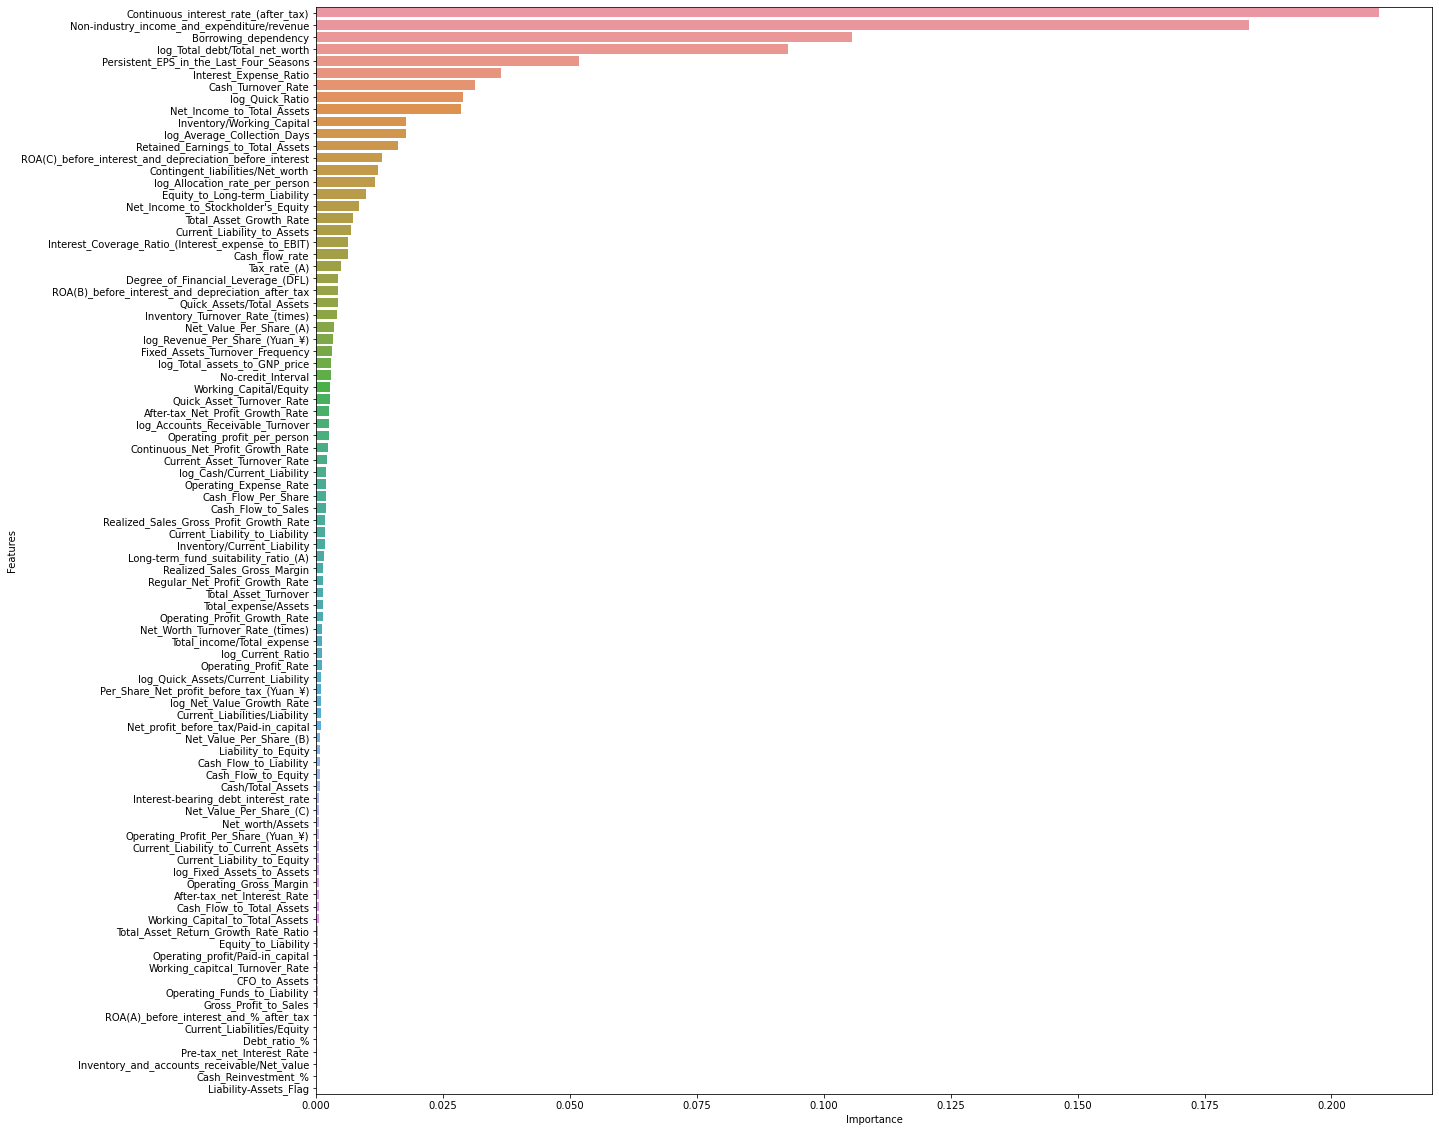

In [117]:
var_imp = pd.concat([pd.DataFrame(X_scaled_pruned.columns),pd.DataFrame(np.transpose(gbc_fit.feature_importances_))],axis=1)
var_imp.columns = ['Features', 'Importance']
var_imp = var_imp.sort_values('Importance',ascending = False)
plt.figure(figsize=(20,20))
sns.barplot(y= 'Features',x= 'Importance',data= var_imp,orient='h')